Підключення бібліотек

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Імпортування данних про дамаг з ганів

In [6]:
weapons_path = 'D:\projects\projects-python\projects\CS2 Major Copenhagen\weapons_data.csv'
df_weapons = pd.read_csv(weapons_path)

Ознайомлення з данними

In [7]:
df_weapons.head()

,Weapon Name,Kills,Shots Fired,Hits,Health Damage,Armor Damage
0,AK-47,3825.0,78575.0,11690.0,392804.0,44602.0
1,AUG,40.0,585.0,134.0,3955.0,181.0
2,AWP,901.0,2080.0,1004.0,81590.0,1045.0
3,CZ75 Auto,12.0,158.0,49.0,1363.0,185.0
4,Decoy Grenade,0.0,32.0,0.0,0.0,0.0


Побудова графіку, який наглядно відобризить кількість дамагу з ганів за весь турнір

Text(0.5, 1.0, 'Top 20 Weapons by Kills at Copenhagen Major')

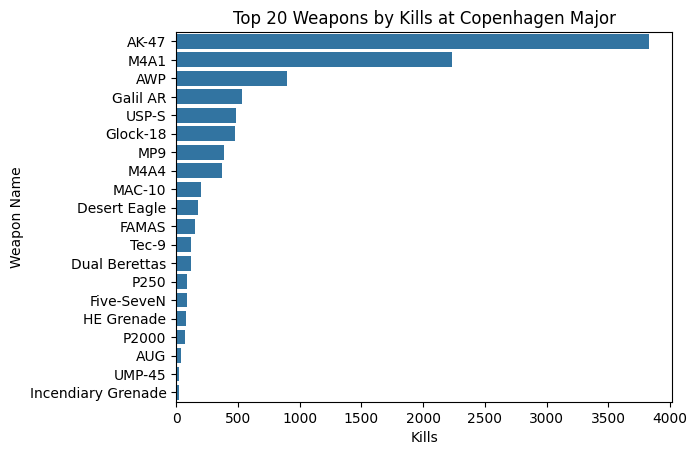

In [8]:
order_weapons = df_weapons.sort_values(by='Kills', ascending=False)['Weapon Name'].iloc[:20].values
sns.barplot(data=df_weapons, x='Kills', y='Weapon Name', order=order_weapons).set_title('Top 20 Weapons by Kills at Copenhagen Major')

Кореляція між дамагом

In [9]:
corr = df_weapons.iloc[:,1:].corr()
corr

,Kills,Shots Fired,Hits,Health Damage,Armor Damage
Kills,1.000000,0.943416,0.915068,0.993664,0.843142
Shots Fired,0.943416,1.000000,0.912460,0.947099,0.845494
Hits,0.915068,0.912460,1.000000,0.945283,0.899011
Health Damage,0.993664,0.947099,0.945283,1.000000,0.884395
Armor Damage,0.843142,0.845494,0.899011,0.884395,1.000000


Відображення кількості пострілів на одне вбивство на CS2 Major Copenhagen

In [28]:
df = pd.DataFrame({"Gans" : df_weapons['Weapon Name'],
                   "Count of shots" :df_weapons['Shots Fired'].div(df_weapons['Kills'])})

df.to_excel('Create_EXEL.xlsx', index=False)
df

,Gans,Count of shots
0,AK-47,20.542484
1,AUG,14.625000
2,AWP,2.308546
3,CZ75 Auto,13.166667
4,Decoy Grenade,inf
5,Desert Eagle,12.195402
6,Dual Berettas,16.008403
7,FAMAS,21.550336
8,Five-SeveN,16.204545
9,Flashbang,inf


Text(0.5, 1.0, 'Відображення кількості пострілів на одне вбивство на CS2 Major Copenhagen')

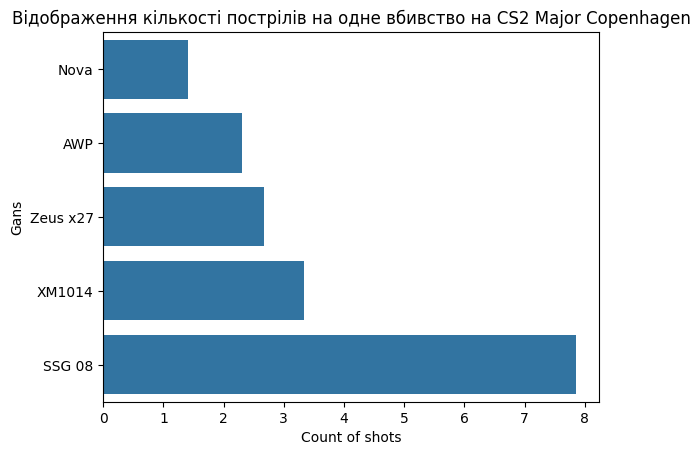

In [31]:
df.replace([np.inf, -np.inf,'Knife','Incendiary Grenade','Molotov','HE Grenade'], np.nan, inplace=True)
df.dropna(inplace=True)
order_weapons = df.sort_values(by='Count of shots', ascending=False)['Gans'].iloc[:20:-1].values
sns.barplot(data=df, x='Count of shots', y='Gans', order=order_weapons).set_title('Відображення кількості пострілів на одне вбивство на CS2 Major Copenhagen')

Імпортування данних про дамаг гравців

In [12]:
players_path = 'D:\projects\projects-python\projects\CS2 Major Copenhagen\Player_Kills.csv'
df_players = pd.read_csv(players_path)

Ознайомлення з данними

In [13]:
df_players.head()

,steam_id,name,team_name,kill_count,assist_count,death_count,kd,score,mvp,headshot_count,...,1v3_lost,1v4_lost,1v5_lost,bomb_planted_count,bomb_defused_count,k1,k2,k3,k4,k5
0,76561197960690195,FalleN,Team B,67,18,73,4.57,215,11,25,...,6,4,3,21,1,32,11,4,1,0
1,76561197967432889,MAJ3R,Eternal Fire,157,43,133,14.48,435,27,81,...,7,4,0,17,1,53,18,6,4,0
2,76561197973140692,mezii,Vitality,256,84,264,20.49,750,54,143,...,9,6,8,32,9,63,32,6,1,0
3,76561197978835160,flameZ,Vitality,299,100,272,23.20,813,50,143,...,15,8,0,20,4,71,33,9,2,0
4,76561197983031494,felps,Imperial Esports,66,24,87,4.64,184,8,33,...,1,2,0,3,2,34,8,4,1,0


Побудова графіку, який наглядно відобризить кількість дамагу гравців за весь турнір

Text(0.5, 1.0, 'Top 20 playes by Kills at Copenhagen Major')

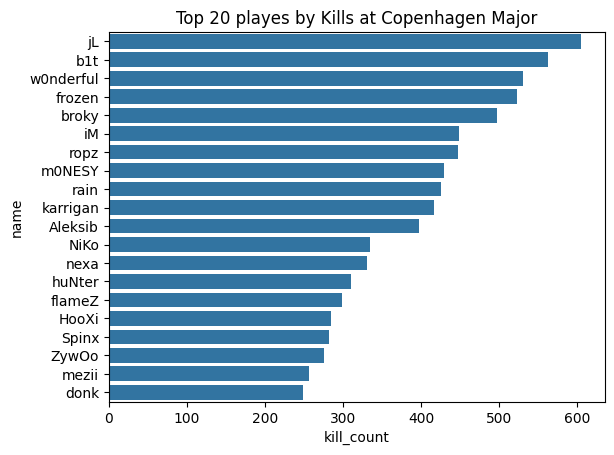

In [14]:
order_kils = df_players.sort_values(by='kill_count', ascending=False)['name'].iloc[:20].values
sns.barplot(data=df_players, x='kill_count', y='name', order=order_kils).set_title('Top 20 playes by Kills at Copenhagen Major')